In [1]:

import os
import glob
import sys
import random
import cv2

import matplotlib.pylab as plt
from PIL import Image, ImageDraw
import pandas as pd
import numpy as np

from sklearn.model_selection import ShuffleSplit, train_test_split

np.random.seed(0)
random.seed(0)

%matplotlib inline

In [2]:
# afad_path = '/home/Data/AFAD_Dataset'
# utk_path = '/home/Data/UTK_Face_Dataset'
# aaf_path = '/home/Data/All_Age_Faces'

# image_path_utk_1 = 'interim/part1/cropped'
# image_path_utk_2 = 'interim/part2/cropped'
# image_path_utk_3 = 'interim/part3/cropped'

# image_path_aaf = 'interim/cropped'

# image_path_afad = 'interim'

# utk_df_1 = pd.read_csv(utk_path + '/processed/part1/utk_face.csv')

# utk_df_1['file_name'] = utk_df_1['file_name'].apply(lambda x: os.path.join(utk_path, image_path_utk_1, x))
# utk_df_1 = utk_df_1[['file_name', 'age', 'gender']]

# utk_df_2 = pd.read_csv(utk_path + '/processed/part2/utk_face.csv')

# utk_df_2['file_name'] = utk_df_2['file_name'].apply(lambda x: os.path.join(utk_path, image_path_utk_2, x))
# utk_df_2 = utk_df_2[['file_name', 'age', 'gender']]

# utk_df_3 = pd.read_csv(utk_path + '/processed/part3/utk_face.csv')

# utk_df_3['file_name'] = utk_df_3['file_name'].apply(lambda x: os.path.join(utk_path, image_path_utk_3, x))
# utk_df_3 = utk_df_3[['file_name', 'age', 'gender']]

# aaf_df_1 = pd.read_csv(aaf_path + '/processed/train.csv')

# aaf_df_1['file_name'] = aaf_df_1['file_name'].apply(lambda x: os.path.join(aaf_path, image_path_aaf, x))
# aaf_df_1 = aaf_df_1[['file_name', 'age', 'gender']]

# aaf_df_2 = pd.read_csv(aaf_path + '/processed/val.csv')

# aaf_df_2['file_name'] = aaf_df_2['file_name'].apply(lambda x: os.path.join(aaf_path, image_path_aaf, x))
# aaf_df_2 = aaf_df_2[['file_name', 'age', 'gender']]

# afad_df = pd.read_csv(afad_path + '/processed/afad.csv')

# afad_df['file_name'] = afad_df['file_name'].apply(lambda x: os.path.join(afad_path, image_path_afad, x))
# afad_df = afad_df[['file_name', 'age', 'gender']]


# df_lst = [utk_df_1, utk_df_2, utk_df_3, aaf_df_1, aaf_df_2, afad_df]

# all_df = pd.concat(df_lst)

In [24]:
# utk_df_1['gender'] = utk_df_1['gender'].apply(lambda x: 1 if x == 0 else 0)
# utk_df_2['gender'] = utk_df_2['gender'].apply(lambda x: 1 if x == 0 else 0)
# utk_df_3['gender'] = utk_df_3['gender'].apply(lambda x: 1 if x == 0 else 0)

In [25]:
# utk_df_1.to_csv(utk_path + '/processed/part1/utk_face.csv')
# utk_df_2.to_csv(utk_path + '/processed/part2/utk_face.csv')
# utk_df_3.to_csv(utk_path + '/processed/part3/utk_face.csv')

In [3]:
# all_df.reset_index(inplace=True, drop = True)

In [4]:
# all_df = all_df[~all_df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [5]:
# all_df['age'] = all_df['age'].apply(lambda x: int(x))
# all_df['gender'] = all_df['gender'].apply(lambda x: int(x))

In [39]:
# all_df.to_csv('/home/Data/training_dataset.csv')

In [42]:
# appa_df_1 = pd.read_csv('/home/Data/appa-real/processed/train.csv')
# appa_df_2 = pd.read_csv('/home/Data/appa-real/processed/valid.csv')
# appa_df_3 = pd.read_csv('/home/Data/appa-real/processed/test.csv')

In [43]:
# all_val_df = pd.concat([appa_df_1, appa_df_2, appa_df_3])

In [46]:
# val_df, test_df = train_test_split(all_val_df, test_size=0.5, random_state=42)

In [47]:
# val_df.to_csv('/home/Data/valid_dataset.csv')
# test_df.to_csv('/home/Data/testing_dataset.csv')

In [2]:
data_path = '/home/Data/all'

all_df = pd.concat([pd.read_csv(data_path + '/training.csv'), pd.read_csv(data_path + '/val.csv'), pd.read_csv(data_path + '/testing.csv')])
all_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [3]:
all_df

,file_name,age,gender
0,/home/Data/AFAD_Dataset/interim/315914-3.jpg,29,1
1,/home/Data/UTK_Face_Dataset/interim/part2/crop...,80,1
2,/home/Data/AFAD_Dataset/interim/475012-0.jpg,39,1
3,/home/Data/AFAD_Dataset/interim/252550-0.jpg,22,0
4,/home/Data/AFAD_Dataset/interim/263773-1.jpg,20,0
...,...,...,...
9995,/home/Data/UTK_Face_Dataset/interim/part2/crop...,31,1
9996,/home/Data/AFAD_Dataset/interim/186544-1.jpg,25,1
9997,/home/Data/AFAD_Dataset/interim/138933-0.jpg,27,0
9998,/home/Data/AFAD_Dataset/interim/1683-1.jpg,36,1


In [7]:
def dataset_source(x):
    source = x['file_name'].split(os.sep)[3]
    return source

all_df['Source'] = all_df.apply(lambda z: dataset_source(z), axis = 1)
all_df = all_df.set_index('Source')
all_df

,file_name,age,gender
Source,,,
AFAD_Dataset,/home/Data/AFAD_Dataset/interim/315914-3.jpg,29,1
UTK_Face_Dataset,/home/Data/UTK_Face_Dataset/interim/part2/crop...,80,1
AFAD_Dataset,/home/Data/AFAD_Dataset/interim/475012-0.jpg,39,1
AFAD_Dataset,/home/Data/AFAD_Dataset/interim/252550-0.jpg,22,0
AFAD_Dataset,/home/Data/AFAD_Dataset/interim/263773-1.jpg,20,0
...,...,...,...
UTK_Face_Dataset,/home/Data/UTK_Face_Dataset/interim/part2/crop...,31,1
AFAD_Dataset,/home/Data/AFAD_Dataset/interim/186544-1.jpg,25,1
AFAD_Dataset,/home/Data/AFAD_Dataset/interim/138933-0.jpg,27,0


In [16]:
utk = all_df.loc['UTK_Face_Dataset']

In [25]:
path = utk[utk.loc['UTK_Face_Dataset', 'gender'] == 0]['file_name'][200]

In [26]:
example = cv2.imread(str(path))

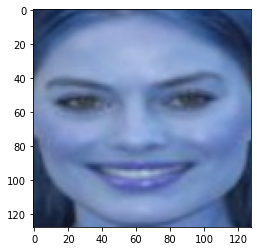

In [27]:
plt.imshow(example)
plt.show()

In [31]:
all_df.set_index(np.arange(len(all_df)))

,file_name,age,gender
0,/home/Data/AFAD_Dataset/interim/315914-3.jpg,29,1
1,/home/Data/UTK_Face_Dataset/interim/part2/crop...,80,1
2,/home/Data/AFAD_Dataset/interim/475012-0.jpg,39,1
3,/home/Data/AFAD_Dataset/interim/252550-0.jpg,22,0
4,/home/Data/AFAD_Dataset/interim/263773-1.jpg,20,0
...,...,...,...
201427,/home/Data/UTK_Face_Dataset/interim/part2/crop...,31,1
201428,/home/Data/AFAD_Dataset/interim/186544-1.jpg,25,1
201429,/home/Data/AFAD_Dataset/interim/138933-0.jpg,27,0
201430,/home/Data/AFAD_Dataset/interim/1683-1.jpg,36,1


<AxesSubplot:xlabel='gender', ylabel='count'>

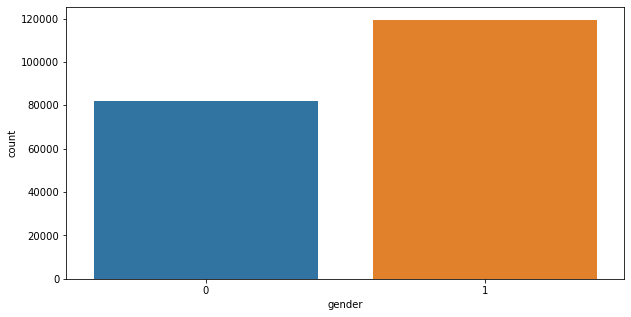

In [32]:
import seaborn as sns

plt.figure(figsize = (10, 5))
sns.countplot(x='gender', data = all_df)

In [28]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201432 entries, AFAD_Dataset to AFAD_Dataset
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   file_name  201432 non-null  object
 1   age        201432 non-null  int64 
 2   gender     201432 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 11.1+ MB


In [33]:
all_df.describe()

,age,gender
count,201432.000000,201432.000000
mean,27.144565,0.592503
std,10.401811,0.491370
min,1.000000,0.000000
25%,21.000000,0.000000
50%,25.000000,1.000000
75%,32.000000,1.000000
max,116.000000,1.000000


In [38]:
distint_ages = len(np.unique(all_df['age'].to_numpy()))

In [39]:
import plotly.express as px

# PRESETS
FIG_FONT = dict(family="Helvetica, Arial", size=14, color="#7f7f7f")
LABEL_COLORS = [px.colors.label_rgb(px.colors.convert_to_RGB_255(x)) for x in sns.color_palette("Spectral", distint_ages)]

In [42]:
fig = px.bar(
    all_df['age'].value_counts().sort_index(),
    labels = {'value' : 'Number of images per age'},
    title = "<b>DISTRIBUTION OF # OF IMAGES PER AGE   " \
                         "<i><sub>(Log Scale for Y-Axis)</sub></i></b>",
    color =  all_df['age'].value_counts(),
    log_y=True, 
    color_discrete_sequence=LABEL_COLORS,
    opacity = 0.85
)

fig.update_layout(legend_title=None,
                  font=FIG_FONT,
                  xaxis_title="<b># of unique images</b>",
                  yaxis_title="<b># Images Per Age</b>")

fig.show()

In [4]:
all_df['age'] = all_df.apply(lambda x: min(x['age'], 100))

all_df

KeyError: 'age'